In this part i have added feature selection part to the code and run it on multiple features here are some results

# Feature selection	accuracy

1.   no selected features 	0.5027173757553101
2.   fdr_level=0.05 		    0.5597826242446899
3.   fdr_level=0.01		      0.6413043737411499
4.   fdr_level=0.0001		    0.6413043737411499
5.   fdr_level=0.00001	    0.64402174949646

# loading locations

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
import sklearn.model_selection
import sklearn.ensemble
import scipy.stats
import numpy as np
import pandas as pd


import sys
import glob
from pathlib import Path

Sample='9'

raw_fnames=[]

raw_file_loc='E:\Project start2\Dataset\Dataset old\B0'+Sample+'\\'
[raw_fnames.extend(glob.glob(raw_file_loc + '*.' + 'gdf'))]

[None]

In [ ]:
raw_fnames

['E:\\Project start2\\Dataset\\Dataset old\\B09\\B0901T.gdf',
 'E:\\Project start2\\Dataset\\Dataset old\\B09\\B0902T.gdf',
 'E:\\Project start2\\Dataset\\Dataset old\\B09\\B0903T.gdf',
 'E:\\Project start2\\Dataset\\Dataset old\\B09\\B0904E.gdf',
 'E:\\Project start2\\Dataset\\Dataset old\\B09\\B0905E.gdf']

# loading The Dataset and seperating useful EEG-signals

In [ ]:
def datafetch(fname):
  raw_files = [mne.io.read_raw_gdf(f, preload=True) for f in fname]
  raw = mne.io.concatenate_raws(raw_files)
  ica=mne.preprocessing.ICA()
  ica.fit(raw.filter(4,38))##RAW(COPY)
  event,eventid=mne.events_from_annotations(raw)
  event_ids={'769':eventid['769'],'770':eventid['770']}
  epochs=mne.Epochs(raw,event,event_id=event_ids,tmin=-0.5, tmax=1.5,preload=True)
  epochs.plot()
  #epochs=ica.apply(epochs,exclude=ica.exclude)
  epochs.pick_types(eeg=True)
  #X=epochs.get_data()
  X=epochs.copy()
  Y=epochs.events[:,-1]==event_ids['769']
  return X, Y


Extracting EDF parameters from E:\Project start2\Dataset\Dataset old\B09\B0901T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 604802  =      0.000 ...  2419.208 secs...


C:\Users\hp\AppData\Local\Temp\ipykernel_12592\660896727.py:2: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw_files = [mne.io.read_raw_gdf(f, preload=True) for f in fname]


Extracting EDF parameters from E:\Project start2\Dataset\Dataset old\B09\B0902T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 604802  =      0.000 ...  2419.208 secs...


C:\Users\hp\AppData\Local\Temp\ipykernel_12592\660896727.py:2: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw_files = [mne.io.read_raw_gdf(f, preload=True) for f in fname]


Extracting EDF parameters from E:\Project start2\Dataset\Dataset old\B09\B0903T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 460730  =      0.000 ...  1842.920 secs...


C:\Users\hp\AppData\Local\Temp\ipykernel_12592\660896727.py:2: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw_files = [mne.io.read_raw_gdf(f, preload=True) for f in fname]


Extracting EDF parameters from E:\Project start2\Dataset\Dataset old\B09\B0904E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 466802  =      0.000 ...  1867.208 secs...


C:\Users\hp\AppData\Local\Temp\ipykernel_12592\660896727.py:2: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw_files = [mne.io.read_raw_gdf(f, preload=True) for f in fname]


Extracting EDF parameters from E:\Project start2\Dataset\Dataset old\B09\B0905E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 458570  =      0.000 ...  1834.280 secs...


C:\Users\hp\AppData\Local\Temp\ipykernel_12592\660896727.py:2: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw_files = [mne.io.read_raw_gdf(f, preload=True) for f in fname]


Filtering raw data in 5 contiguous segments
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished


Fitting ICA to data using 6 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 6 components
Fitting ICA took 9.1s.
Used Annotations descriptions: ['1023', '1077', '1078', '1079', '1081', '276', '277', '32766', '768', '769', '770', '781', '783']
Not setting metadata
400 matching events found
Setting baseline interval to [-0.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 400 events and 501 original time points ...
0 bad epochs dropped


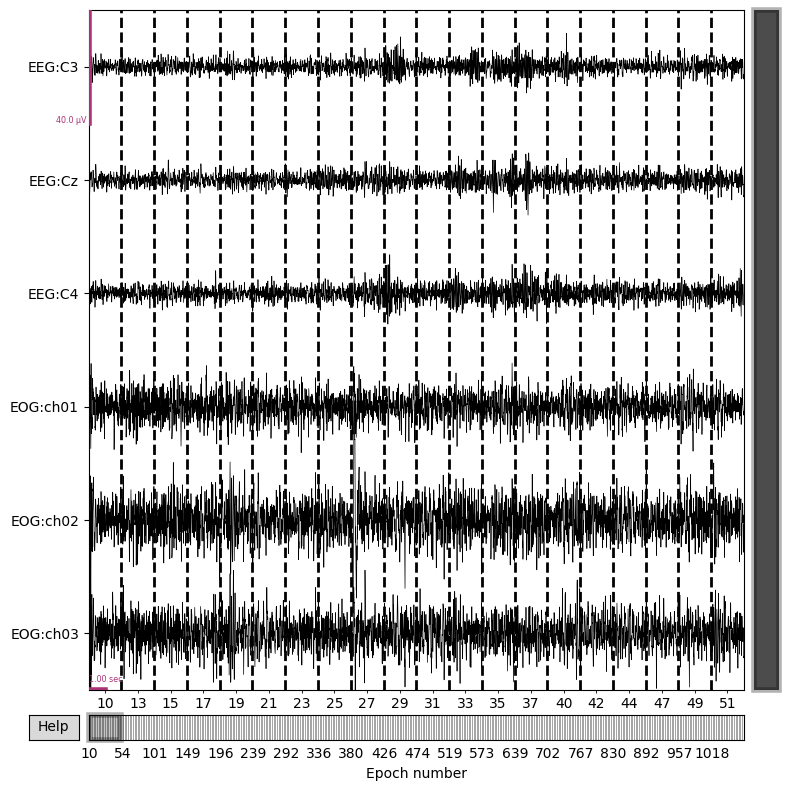

In [ ]:
x,y=datafetch(raw_fnames)

In [ ]:
#test_x,test_y=datafetch(test_fnames)

In [ ]:
x

Number of events,400
Events,769: 200770: 200
Time range,-0.500 – 1.500 sec
Baseline,-0.500 – 0.000 sec


In [ ]:
y

array([ True,  True, False,  True, False, False,  True, False, False,
        True, False,  True,  True, False,  True, False, False,  True,
        True, False,  True,  True, False, False, False,  True,  True,
       False, False,  True, False, False,  True,  True,  True, False,
       False,  True,  True, False, False,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True, False, False,
       False, False, False, False,  True, False,  True, False,  True,
        True, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True, False,  True,  True, False,  True,  True,
        True, False, False, False,  True,  True, False, False, False,
       False, False, False,  True,  True,  True, False,  True,  True,
        True, False, False, False, False,  True, False,  True,  True,
       False,  True, False, False,  True,  True, False,  True,  True,
       False,  True,

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder


le = preprocessing.LabelEncoder()
le.fit(y)
y_data1=le.transform(y)

#binary encode
ole = OneHotEncoder(sparse=False)
y_data1 = y_data1.reshape(len(y_data1), 1)
y_data = ole.fit_transform(y_data1)

print(y_data[1])
print(type(y_data))

[0. 1.]
<class 'numpy.ndarray'>


In [ ]:
x._data

array([[[ 2.37630764e-06,  3.78030045e-06,  3.93840979e-06, ...,
          1.26204978e-06,  5.61527707e-07, -3.92606771e-07],
        [ 6.46023020e-07, -5.26649373e-08, -4.31331329e-07, ...,
         -1.13207933e-06, -1.01612770e-06, -6.74910341e-07],
        [ 7.53642957e-08,  8.58091285e-07,  1.98619876e-06, ...,
         -1.00711706e-06, -1.22345473e-06, -1.20219215e-06],
        [ 2.77557963e-06,  4.33780805e-06,  5.39895157e-06, ...,
          2.68851110e-06,  3.08124523e-06, -1.40730453e-07],
        [ 3.00319627e-06,  5.69826070e-06,  8.09738711e-06, ...,
          1.69354068e-06,  5.38177178e-07, -2.65556849e-06],
        [ 6.98511379e-06,  7.88890799e-06,  7.39512855e-06, ...,
          6.37316648e-06,  4.65952675e-06, -7.53754023e-08]],

       [[-6.61272332e-07,  3.65265057e-07,  9.62345356e-07, ...,
         -2.02824942e-06, -2.44885636e-06, -2.82585662e-06],
        [ 5.13331098e-07,  2.11656587e-07,  2.10669005e-07, ...,
          2.87656650e-07,  1.85709939e-07,  1.49861

In [ ]:
x._data.shape

(400, 6, 501)

In [ ]:
# Convert the epochs time series of each  to a DataFrame
df_list = []
for k in range(x._data.shape[0]):
    df = pd.DataFrame(x._data[k,:,:].T,columns=x.ch_names)
    df['id'] = k
    df_list.append(df)

df = pd.concat(df_list)

In [ ]:
df.head

<bound method NDFrame.head of            EEG:C3        EEG:Cz        EEG:C4      EOG:ch01  EOG:ch02  \
0    2.376308e-06  6.460230e-07  7.536430e-08  2.775580e-06  0.000003   
1    3.780300e-06 -5.266494e-08  8.580913e-07  4.337808e-06  0.000006   
2    3.938410e-06 -4.313313e-07  1.986199e-06  5.398952e-06  0.000008   
3    2.518308e-06 -4.668654e-07  2.978926e-06  4.629222e-06  0.000008   
4    1.490841e-07 -3.307223e-07  3.468543e-06  1.511428e-06  0.000004   
..            ...           ...           ...           ...       ...   
496  1.055277e-06 -5.028076e-08  1.667817e-06  7.094426e-06  0.000003   
497  7.813981e-07 -3.207900e-07  1.948595e-06  2.823430e-06 -0.000003   
498 -5.471261e-09 -8.160661e-07  1.679848e-06 -4.834028e-07 -0.000005   
499 -1.002043e-06 -1.346255e-06  1.012794e-06 -6.951970e-07 -0.000002   
500 -1.773882e-06 -1.694702e-06  2.148266e-07  1.341322e-06  0.000004   

         EOG:ch03   id  
0    6.985114e-06    0  
1    7.888908e-06    0  
2    7.395129e-06 

#Feature Extraction

In [ ]:
# Extract the features using tsfresh
import tsfresh
extracted_features = tsfresh.extract_features(df,column_id='id')
tsfresh.utilities.dataframe_functions.impute(extracted_features)

In [ ]:
featureData = extracted_features.values

In [ ]:
#data0=extracted_features
#data0['target']=y
#data0.columns=["F"+str(i) for i in range(1, data0.shape[1]+1)]
#data0.rename(columns = {data0.columns[-1]:'target'}, inplace = True)

In [ ]:
#data0.to_csv(r'C:\Users\hp\Desktop\\'+(os.path.basename(raw_fnames[0]))[0:3]+'F.csv',index=False)

In [ ]:
print("Number of trials: %d, number of features: %d"%featureData.shape)

Number of trials: 400, number of features: 4734


# Feature selection

In [ ]:
sel_x=tsfresh.select_features(extracted_features,y,fdr_level=5)

In [ ]:
data2=sel_x
data2['target']=y
data2.columns=["F"+str(i) for i in range(1, data2.shape[1]+1)]
data2.rename(columns = {data2.columns[-1]:'target'}, inplace = True)

In [ ]:
data2.to_csv(r'C:\Users\hp\Desktop\\'+(os.path.basename(raw_fnames[0]))[0:3]+'.csv',index=False)

In [ ]:
data2.head()

In [ ]:
sel_x

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F416,F417,F418,F419,F420,F421,F422,F423,F424,target
0,0.179986,-0.343713,0.351099,-0.480856,0.723739,3.592490e-14,8.458976e-09,9.652093e-14,3.091715e-08,2.462076e-07,...,-4.110190e-08,3.015204e-11,0.132396,-4.044098e-13,2.285530e-06,125.812080,0.752637,0.000519,-0.000030,True
1,0.019551,0.007108,0.163676,-0.234025,0.365256,5.569470e-14,1.087213e-09,1.437531e-13,1.528366e-08,2.980551e-07,...,6.536374e-08,2.409113e-11,0.035035,-8.462375e-14,-1.303486e-06,-9.649794,0.852831,0.000218,0.000020,True
2,-0.014159,-0.057583,0.003134,-0.140419,0.320601,5.084571e-14,-8.528034e-10,1.460382e-13,3.395612e-10,3.094837e-07,...,-5.820730e-08,1.811792e-11,0.072844,-1.030896e-14,7.182423e-07,-11.358505,0.871135,0.000338,-0.000031,False
3,0.008013,-0.043059,0.000572,0.170608,0.349960,3.199609e-14,4.108561e-10,9.065444e-14,5.650542e-11,2.421959e-07,...,-3.609966e-08,1.553029e-11,0.071027,-3.307712e-15,-6.456244e-07,-18.213152,0.774580,0.000285,-0.000012,True
4,0.102112,-0.115650,0.241387,-0.091588,0.644480,2.670079e-14,5.390523e-09,7.834372e-14,2.410304e-08,2.389113e-07,...,1.572847e-07,2.420053e-11,0.042098,-2.031503e-13,1.601381e-07,-89.165158,0.812701,0.000578,-0.000153,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.015002,-0.095116,0.041874,-0.094848,0.332574,4.276185e-14,1.003171e-09,1.569874e-13,5.137645e-09,3.380185e-07,...,1.506796e-08,4.262161e-11,0.040000,-1.036808e-13,-1.541774e-06,-146.431286,0.844493,0.000336,-0.000022,True
396,-0.001782,0.039686,0.027159,0.088576,0.331285,3.948604e-14,-1.261838e-10,1.069550e-13,3.130157e-09,2.625556e-07,...,-3.278624e-08,2.416075e-11,0.121240,-5.419566e-14,5.429967e-07,53.836216,0.849539,0.000158,-0.000050,False
397,-0.059390,0.258527,0.005275,0.191449,-0.037984,7.733386e-14,-3.636743e-09,2.872568e-13,5.445690e-10,4.588501e-07,...,3.157804e-08,1.796168e-11,0.246980,1.771658e-14,-1.221225e-06,80.991162,0.807703,0.000214,-0.000012,False
398,0.016131,-0.095166,0.089458,-0.179452,0.538194,6.192515e-14,8.814325e-10,1.694519e-13,8.107984e-09,3.292976e-07,...,7.110061e-08,1.721992e-11,0.188238,9.164204e-15,-1.234739e-06,143.220510,0.777735,0.000404,-0.000035,True
